In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importing the Datasets

In [2]:
df = pd.read_excel("D:\\DataScience\\Machine-Learning-Projects\\Flight-Fare-Prediction\Datasets\\Data_Train.xlsx")
x_test = pd.read_excel("D:\\DataScience\\Machine-Learning-Projects\\Flight-Fare-Prediction\Datasets\\Test_set.xlsx")
y_test = pd.read_excel("D:\\DataScience\\Machine-Learning-Projects\\Flight-Fare-Prediction\Datasets\\Sample_submission.xlsx")

In [3]:
df.shape

(10683, 11)

In [4]:
x_test.shape

(2671, 10)

In [5]:
x_test["Price"] = y_test

In [6]:
x_test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info,15998
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info,16612
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included,25572
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info,25778
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info,16934


In [7]:
# concatinating x_train, and x_test

df = pd.concat([df, x_test], ignore_index= True)

# Simple PreProcessing

### Observations: -

**Problems**

* Route and Total_Stops has 1 missing value
* Airline should be of categorical type
* Date_of_Journey is Object type it should be of DateTime type
* Source should be of categorical type
* Destination should be of categorical type
* Route has some info. in it, Preprocessing need to be done.
* Dep_Time should be of type DateTime
* Arrival_Time should be of type DateTime.
* Duration should be of type DateTime.
* Total_Stops should be of type Category.
* Additional_Info need to be preprocessed.
* Price Column has some outliers.
* There are 220 duplicated values in the dataset.


In [8]:
df.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882


In [9]:
# df["Dep_Hour"] = pd.to_datetime(df["Dep_Time"]).dt.hour
# df["Dep_Minute"] = pd.to_datetime(df["Dep_Time"]).dt.minute

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13354 entries, 0 to 13353
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          13354 non-null  object
 1   Date_of_Journey  13354 non-null  object
 2   Source           13354 non-null  object
 3   Destination      13354 non-null  object
 4   Route            13353 non-null  object
 5   Dep_Time         13354 non-null  object
 6   Arrival_Time     13354 non-null  object
 7   Duration         13354 non-null  object
 8   Total_Stops      13353 non-null  object
 9   Additional_Info  13354 non-null  object
 10  Price            13354 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 1.1+ MB


In [11]:
df.describe()

,Price
count,13354.000000
mean,11301.720009
std,6452.843082
min,1759.000000
25%,6135.250000
50%,10262.000000
75%,14781.000000
max,79512.000000


In [12]:
df.duplicated().sum()

220

In [13]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [14]:
df.shape

(13354, 11)

In [15]:
df["Total_Stops"].value_counts()

Total_Stops
1 stop      7056
non-stop    4340
2 stops     1899
3 stops       56
4 stops        2
Name: count, dtype: int64

In [16]:
# Converting Airline column from object to Category
df["Airline"] = df["Airline"].astype("category")

# Converting Date-of-Journey column from object to Datetime
df["Date_of_Journey"] = pd.to_datetime(df["Date_of_Journey"])

# Converting Source column from object to Category
df["Source"] = df["Source"].astype("category")

# Converting Destination column from object to Category
df["Destination"] = df["Destination"].astype("category")

# Converting Dep_Time column from object to Datetime
df["Dep_Time"] = pd.to_timedelta(df['Dep_Time'] + ":00")

# Converting Arrival_Time column from object to Datetime
df["Arrival_Time"] = pd.to_datetime(df['Arrival_Time'])

# Converting Duration column from object to Datetime
df["Duration"] = pd.to_timedelta(df['Duration'].str.replace("h", "hours").str.replace("m", "minutes"))

# Converting Total_Stops column from object to Category
df["Total_Stops"] = df["Total_Stops"].astype("category")

# Converting Additional_Info column from object to Category
df["Additional_Info"] = df["Additional_Info"].astype("category")

C:\Users\DIWAKAR SINGH\AppData\Local\Temp\ipykernel_2344\3381871024.py:5: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df["Date_of_Journey"] = pd.to_datetime(df["Date_of_Journey"])
C:\Users\DIWAKAR SINGH\AppData\Local\Temp\ipykernel_2344\3381871024.py:17: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Arrival_Time"] = pd.to_datetime(df['Arrival_Time'])


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13354 entries, 0 to 13353
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype          
---  ------           --------------  -----          
 0   Airline          13354 non-null  category       
 1   Date_of_Journey  13354 non-null  datetime64[ns] 
 2   Source           13354 non-null  category       
 3   Destination      13354 non-null  category       
 4   Route            13353 non-null  object         
 5   Dep_Time         13354 non-null  timedelta64[ns]
 6   Arrival_Time     13354 non-null  datetime64[ns] 
 7   Duration         13354 non-null  timedelta64[ns]
 8   Total_Stops      13353 non-null  category       
 9   Additional_Info  13354 non-null  category       
 10  Price            13354 non-null  int64          
dtypes: category(5), datetime64[ns](2), int64(1), object(1), timedelta64[ns](2)
memory usage: 692.7+ KB


In [18]:
df.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,0 days 22:20:00,2024-03-22 01:10:00,0 days 02:50:00,non-stop,No info,3897
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,0 days 05:50:00,2024-01-19 13:15:00,0 days 07:25:00,2 stops,No info,7662
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,0 days 09:25:00,2024-06-10 04:25:00,0 days 19:00:00,2 stops,No info,13882


# EDA ( Exploratory Data Analysis )

In [19]:
df.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,0 days 22:20:00,2024-03-22 01:10:00,0 days 02:50:00,non-stop,No info,3897
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,0 days 05:50:00,2024-01-19 13:15:00,0 days 07:25:00,2 stops,No info,7662


### Airline

* Some of the Airlines has very less data, those airlines are :- Jet Airways Business, Multiple carriers Premium economy, Trujet, Vistara Premium economy 

Solutions :- 

* Remove the enteries of these airlines.

In [20]:
df["Airline"].value_counts()

Airline
Jet Airways                          4746
IndiGo                               2564
Air India                            2192
Multiple carriers                    1543
SpiceJet                             1026
Vistara                               608
Air Asia                              405
GoAir                                 240
Multiple carriers Premium economy      16
Jet Airways Business                    8
Vistara Premium economy                 5
Trujet                                  1
Name: count, dtype: int64

<Axes: xlabel='Airline'>

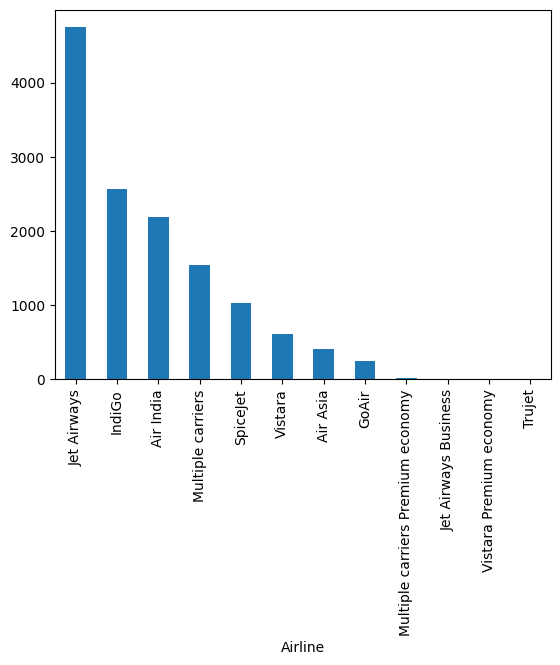

In [21]:
df["Airline"].value_counts().plot(kind = "bar")

In [23]:
# Drop the Airlines Values who has the very less data

filtered_airlines_list = df["Airline"].value_counts()[df["Airline"].value_counts().values > 20].index.to_list()

df[df["Airline"].isin(filtered_airlines_list)]

0        True
1        True
2        True
3        True
4        True
         ... 
13349    True
13350    True
13351    True
13352    True
13353    True
Name: Airline, Length: 13354, dtype: bool